# <font color='blue'>Estudo de Caso</font>

## <font color='blue'>Qual influência de horas de estado no valor do salário</font>

## <font color='blue'>Machine Learning com Scikit-Learn</font>


Problema de Negócio:

Usando dados históricos é possível prever o salário de alguém com base no tempo dedicado aos estudos em horas por mês?

![DSA](proj.png)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Carregando os Dados

In [5]:
# Carrega o dataset
df_salario = pd.read_csv('dataset.csv')

In [6]:
df_salario.shape

(500, 2)

In [7]:
df_salario.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [8]:
df_salario.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [9]:
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## Análise Exploratória - Resumo Estatístico

In [10]:
# Verifica se há valores ausentes
df_salario.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [11]:
# Correlação
df_salario.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [12]:
# Resumo estatístico do dataset 
df_salario.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [13]:
# Resumo estatístico da variável preditora
df_salario["horas_estudo_mes"].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<AxesSubplot:xlabel='horas_estudo_mes', ylabel='Count'>

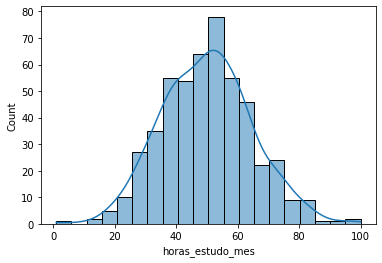

In [14]:
# Histograma da variável preditora
sns.histplot(data = df_salario, x = "horas_estudo_mes", kde = True)

## Preparação dos Dados

In [22]:
# Prepara a variável de entrada X
X = np.array(df_salario['horas_estudo_mes'])

In [23]:
type(X)

numpy.ndarray

In [24]:
# Ajusta o shape de X
X = X.reshape(-1, 1)

In [27]:
# Prepara a variável alvo
y = df_salario['salario']

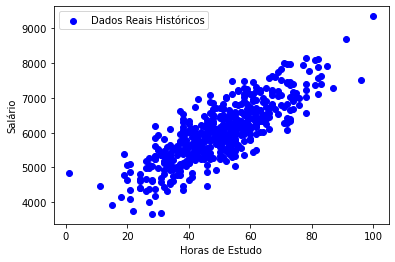

In [28]:
# Gráfico de dispersão entre X e y
plt.scatter(X, y, color = "blue", label = "Dados Reais Históricos")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [30]:
# Dividir dados em treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
X_treino.shape

(400, 1)

In [32]:
X_teste.shape

(100, 1)

In [33]:
y_treino.shape

(400,)

In [34]:
y_teste.shape

(100,)

## Modelagem Preditiva (Machine Learning)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [35]:
# Cria o modelo de regressão linear simples
modelo = LinearRegression()

In [37]:
# Treina o modelo
modelo.fit(X_treino, y_treino)

LinearRegression()

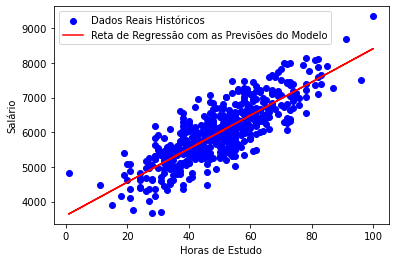

In [38]:
# Visualiza a reta de regressão linear (previsões) e os dados reais usados no treinamento
plt.scatter(X, y, color = "blue", label = "Dados Reais Históricos")
plt.plot(X, modelo.predict(X), color = "red", label = "Reta de Regressão com as Previsões do Modelo")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [39]:
# Avalia o modelo nos dados de teste
score = modelo.score(X_teste, y_teste)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.59


In [40]:
# Intercepto - parâmetro w0
modelo.intercept_

3596.7837243727527

In [41]:
# Slope - parâmetro w1
modelo.coef_

array([48.18185277])

Algoritmo de Regressão Linear:

![DSA](imagens/reglinear.png)

## Deploy do Modelo

Usaremos o modelo para prever o salário com base nas horas de estudo.

In [42]:
# Define um novo valor para horas de estudo
horas_estudo_novo = float(input("Digite o número de horas de estudo por mês: "))
horas_estudo_novo = np.array([[horas_estudo_novo]])


# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Digite o número de horas de estudo por mês: 60
Se você estudar cerca de [[60.]] horas por mês seu salário pode ser igual a [6487.69489066]


In [43]:
# Mesmo resultado anterior usando os parâmetros (coeficientes) aprendidos pelo modelo
# y_novo = w0 + w1 * X
salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)
print(salario)

[[6487.69489066]]


# Fim